# Assignment 1 Homework 4

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [1]:
#Worked with Mei Guan on this assignment

In [2]:
#much of this code has been adapted from the example provided by Professor 

In [3]:
from __future__ import print_function

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
np.random.seed(666)

## choose which distributions to use 

In [5]:
distributions = ['gaus', 'pois', 'binomial', 'chisq', 'lnorm' ]

#Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice- deciding on LogNormal

## and which mean to give it

In [6]:
#all will attempt to have mean of 100
mymean = 100

# Normal distribution


In [7]:
distributions

['gaus', 'pois', 'binomial', 'chisq', 'lnorm']

In [10]:
#make a dictionary 
md = {}

In [17]:
#100 random numbers between 10 and 2000
mysize = []
for i in range(100):
    size = int(np.random.rand()*1990+10)
    
    mysize.append(size)
print (mysize, len(mysize))

[1901, 1442, 1657, 1565, 528, 1010, 872, 376, 678, 364, 139, 1386, 1256, 331, 322, 1814, 1124, 1975, 815, 1306, 1219, 853, 812, 1298, 1931, 883, 1473, 1797, 1563, 1607, 1974, 1922, 1956, 1209, 43, 1348, 1302, 909, 542, 1117, 1724, 1869, 1038, 668, 321, 1047, 947, 1989, 1434, 835, 1286, 1046, 1140, 948, 1218, 305, 1080, 1320, 1663, 1368, 1298, 1349, 1064, 1152, 79, 522, 1875, 1010, 1907, 1723, 778, 705, 166, 454, 1939, 1446, 54, 316, 1069, 301, 694, 1320, 1035, 562, 1779, 294, 1798, 1196, 444, 63, 148, 1057, 1769, 127, 86, 1740, 436, 202, 1969, 270] 100


Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


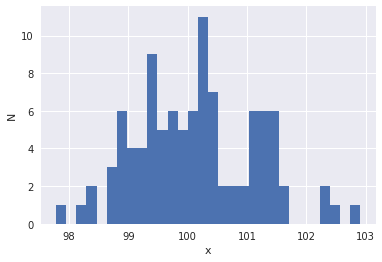

In [18]:
#graph one sample of 100 with mean 100
md['gaus'] = np.random.randn(100)+mymean
pl.hist(md['gaus'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: normal distribution for N=100, not as smooth of a curve as what is expected in the next piece when having larger sample sizes. 

In [19]:
print ("normal distribution mean: %.2f, standard deviation: %.2f"%(md['gaus'].mean(), md['gaus'].std()))

normal distribution mean: 100.14, standard deviation: 1.00


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


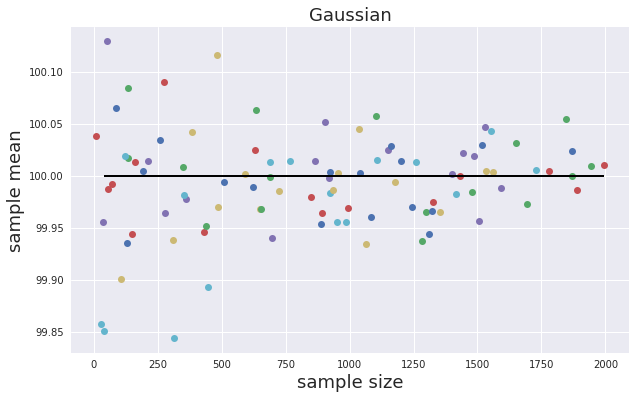

In [46]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['gaus'] = {} 

#loopp through 100 random sizes to create 100 samples 

for i in range(100):
    size = int(np.random.rand()*1990+10)
    md['gaus'][size] = np.random.randn(size)+100
    
    
# save the means for plotting later    

md['gaus']['means'] = {}
axgaus_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['gaus']:
    if not type(nn) == str:
        md['gaus']['means'][nn] = md['gaus'][nn].mean()
        #and plot it
        axgaus_mu_n.plot(nn, md['gaus']['means'][nn], 'o')
        axgaus_mu_n.set_xlabel('sample size', fontsize=18)
        axgaus_mu_n.set_ylabel('sample mean', fontsize=18)
        axgaus_mu_n.set_title('Gaussian', fontsize=18)
        axgaus_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

# Figure 2: graph the means of the 100 samples and their cooresponding means. As suggested from the Central limit theorum and this type of distribution, the likelihood that the sample is closer to the true mean increases as the size of the sample increases

# now the histogram of the mean of all samples: 

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


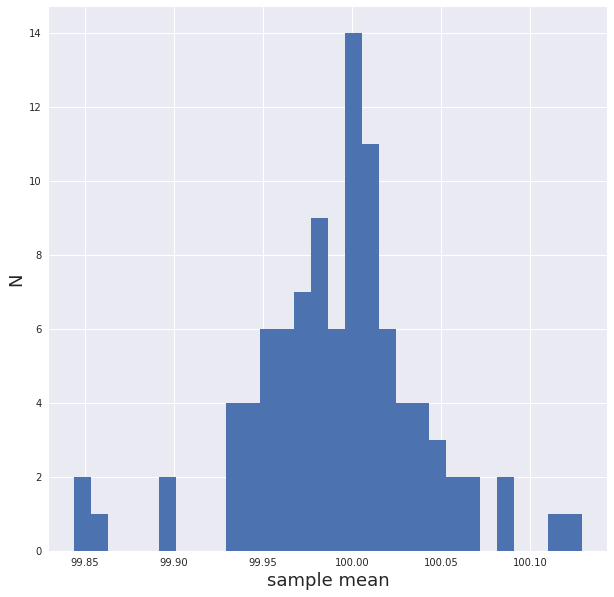

In [47]:
gausmeans = list(md['gaus']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(gausmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 3: This graph shows similar information as the scatter plot above. This time, we can see that the distribution of the means is also a normal distribution. Many samples have a mean of expected 100 and the rest are relatively close. 

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [22]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


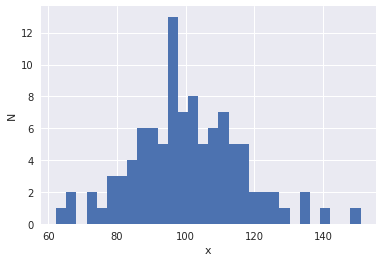

In [23]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100. This sample of 100 shows a lot of irregularity in the distribution

## let numpy calculate what the mean and stdev of this distribution are

In [24]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.55, standard deviation: 15.99


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


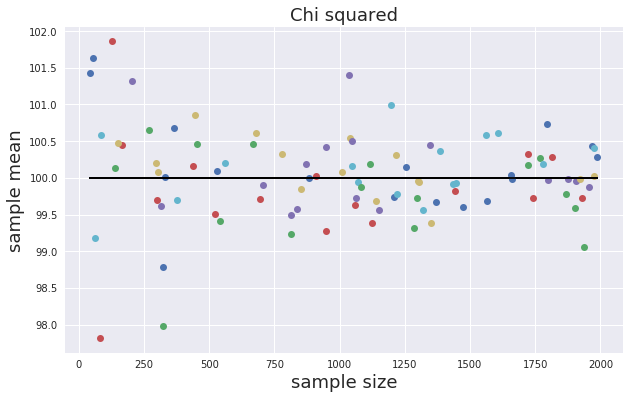

In [25]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(mymean, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: As the sample size increases, the sample's mean is more likely to be closer to 100 and in turn more representative of the overall population.

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


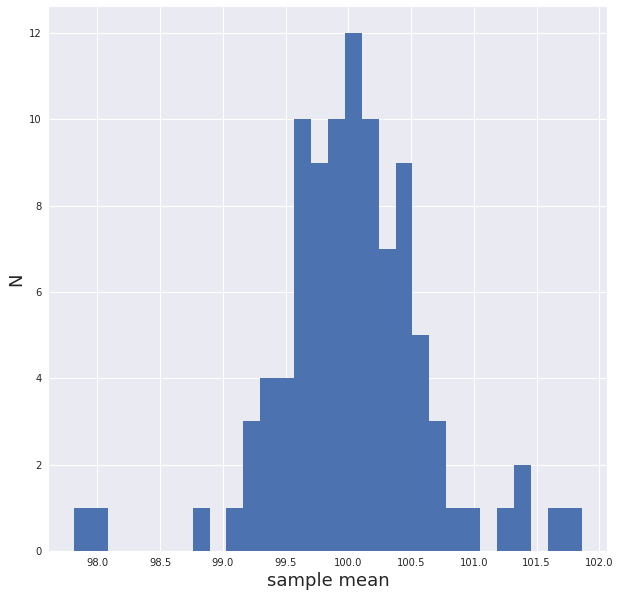

In [26]:
#graph mean values
chimeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(chimeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: this ditribution is much smoother than the first since it is based on multple samples. Paricularly the samples with larger sizes are more likely to be in the center 50% of this distribution. 

# Do it for the Poisson distribution

In [27]:
distributions

['gaus', 'pois', 'binomial', 'chisq', 'lnorm']

(array([  1.,   2.,   0.,   1.,   2.,   1.,   3.,   2.,   2.,   1.,   5.,
          5.,   6.,   7.,   4.,   7.,  13.,   2.,   6.,   4.,   4.,   6.,
          6.,   3.,   2.,   1.,   2.,   0.,   1.,   1.]),
 array([  73. ,   74.8,   76.6,   78.4,   80.2,   82. ,   83.8,   85.6,
          87.4,   89.2,   91. ,   92.8,   94.6,   96.4,   98.2,  100. ,
         101.8,  103.6,  105.4,  107.2,  109. ,  110.8,  112.6,  114.4,
         116.2,  118. ,  119.8,  121.6,  123.4,  125.2,  127. ]),
 <a list of 30 Patch objects>)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


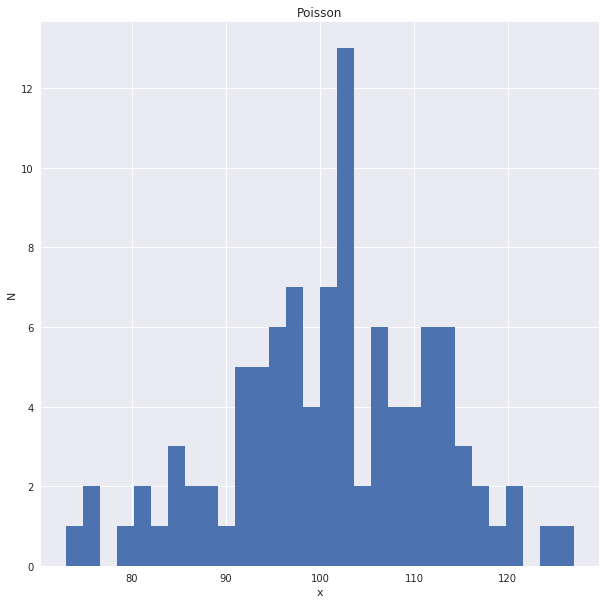

In [28]:
#graph one poisson with mean 100 and size 100
plt.figure(figsize=(10, 10))
md['pois'] = np.random.poisson(mymean, 100)
plt.ylabel('N')
plt.xlabel('x')
plt.title('Poisson')
plt.hist(md['pois'], bins = 30)

## FIGURE 1: once again this single sample of 100 is pretty irregular when looking at a histogram with 30 bins. If choosing a smaller bin size, it is likely to look more smooth though. 

In [29]:
print ("normal distribution mean: %.2f, standard deviation: %.2f"%(np.random.poisson(mymean, 100).mean(), np.random.poisson(mymean, 100).std()))

normal distribution mean: 99.85, standard deviation: 9.47


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


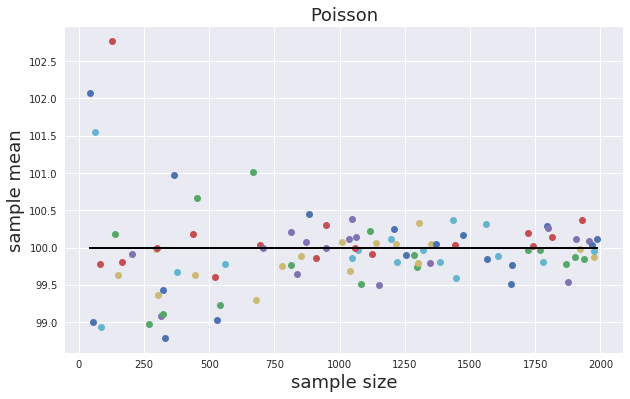

In [30]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['pois'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for i in range(100):
    md['pois'][mysize[i]] = np.random.poisson(mymean, mysize[i])
    
    
# save the means for plotting later    

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: As the sample size increases, the sample's mean is more likely to be closer to 100 and in turn more representative of the overall population. 

Text(0.5,1,'Poisson')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


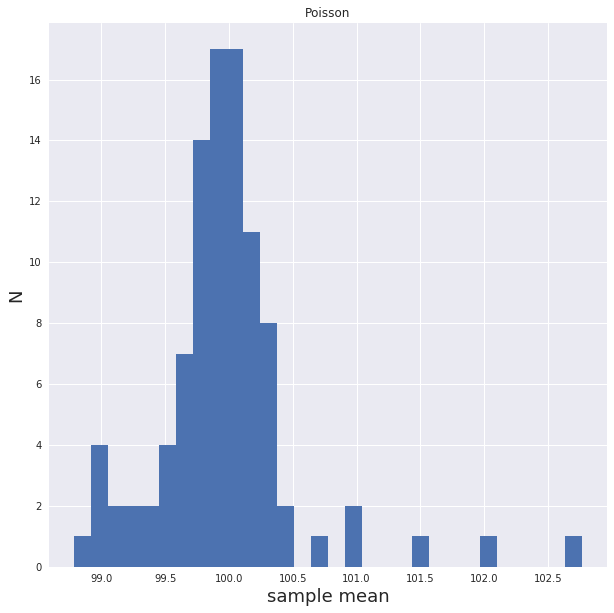

In [31]:
poismeans = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(poismeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Poisson')

## Figure 3: The distribution of the means shows a much smoother resprentation of the  and it is now very easy to identify the most common mean

# Do it for the Binomial distribution

In [32]:
distributions

['gaus', 'pois', 'binomial', 'chisq', 'lnorm']

Text(0.5,1,'Binomial')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


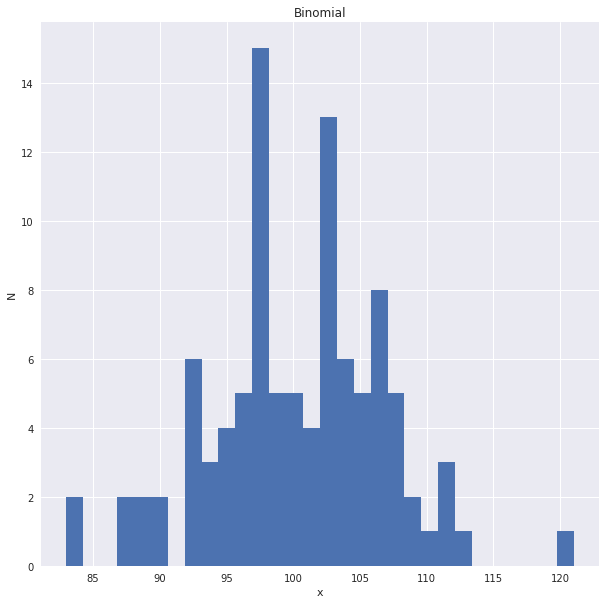

In [33]:
#plot one sample with size 100 and population mean of 100
#used .5 and 200 to represent 100 mean
plt.figure(figsize= (10,10))

md['binomial'] = np.random.binomial(200, .5, 100)
pl.hist(md['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title('Binomial')


# Figure 1: Despite this being the first passthrough, 100 is still the most common number to occur out of the random binomal generator- though it will likely be more represtative with more samples

In [34]:
print ("normal distribution mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

normal distribution mean: 100.31, standard deviation: 6.57


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


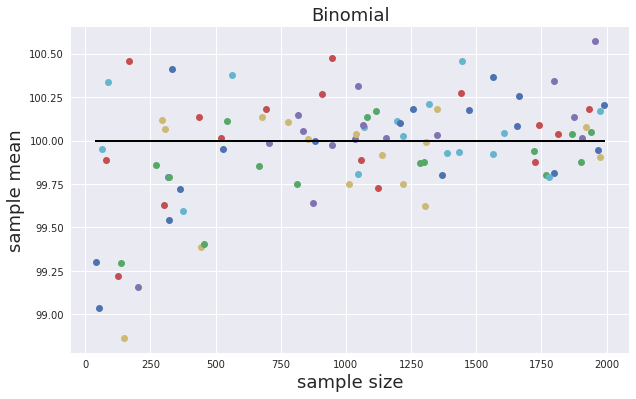

In [35]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['binomial'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for i in range(100):
    md['binomial'][mysize[i]] = np.random.binomial(200, .5, mysize[i])
    
    
# save the means for plotting later    

md['binomial']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Binomial', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: As the sample size increases, the sample's mean is more likely to be closer to 100 and in turn more representative of the overall population. 

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


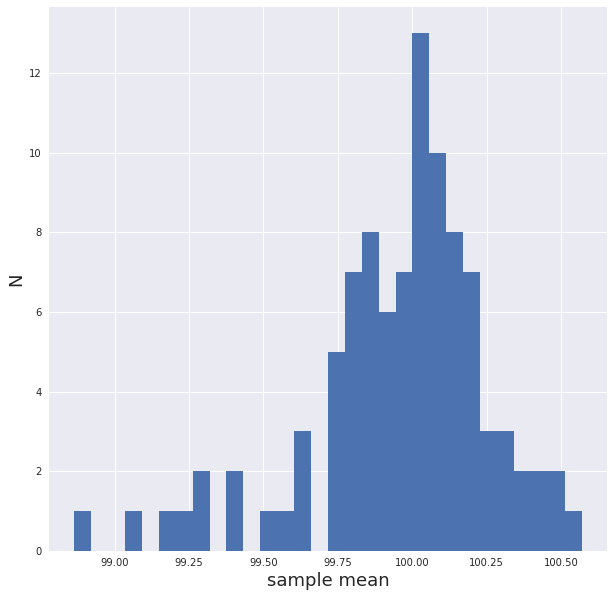

In [36]:
#plot the means
binom_means = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(binom_means,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: The distribution of the means shows a much smoother resprentation of the  and it is now very easy to identify the most common mean

# Do it for another distribution

In [37]:
#Chose log normal for last distribution

In [38]:
#confirming the best way to get a mean of 100
log100 = np.log(100)

In [39]:
math.exp(log100)

100.00000000000004

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


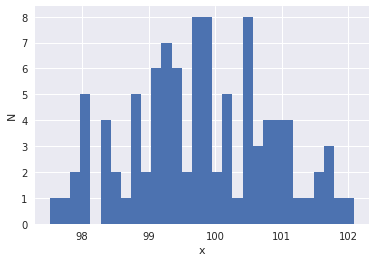

In [40]:
#lognormal 
#graph one sample of 100 with mean 100
mu, sigma = log100, .01 # mean and standard deviation
md['lnorm'] = np.random.lognormal(mu, sigma, size = 100)
pl.hist(md['lnorm'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

Figure 1: the distribution here looks pretty normal, but the lognormal distribution tends to be pretty skewed. Having more samples and larger samples should represent this

In [41]:
print ("normal distribution mean: %.2f, standard deviation: %.2f"%(md['lnorm'].mean(), md['lnorm'].std()))

normal distribution mean: 99.77, standard deviation: 1.05


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


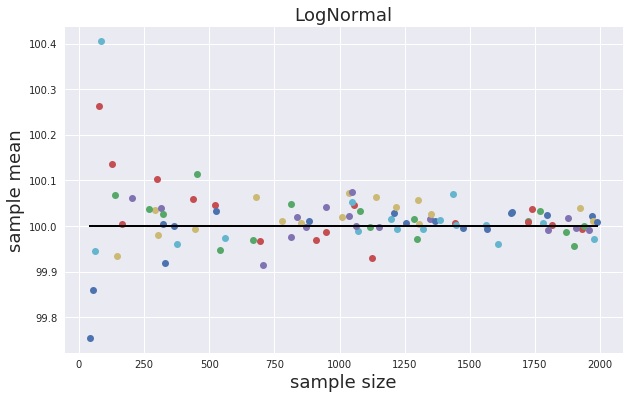

In [42]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['lnorm'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for i in mysize:
    md['lnorm'][i] = np.random.lognormal(mu, sigma, i)
    
# save the means for plotting later    

md['lnorm']['means'] = {}
axlnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['lnorm']:
    if not type(nn) == str:
        md['lnorm']['means'][nn] = md['lnorm'][nn].mean()
        #and plot it
        axlnorm_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')
        axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axlnorm_mu_n.set_title('LogNormal', fontsize=18)
        axlnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Figure 2: After graphing the means of varying sizes of lognormal samples, the skewedness is more apparent, also the larger samples are closer to the mean of 100. 

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


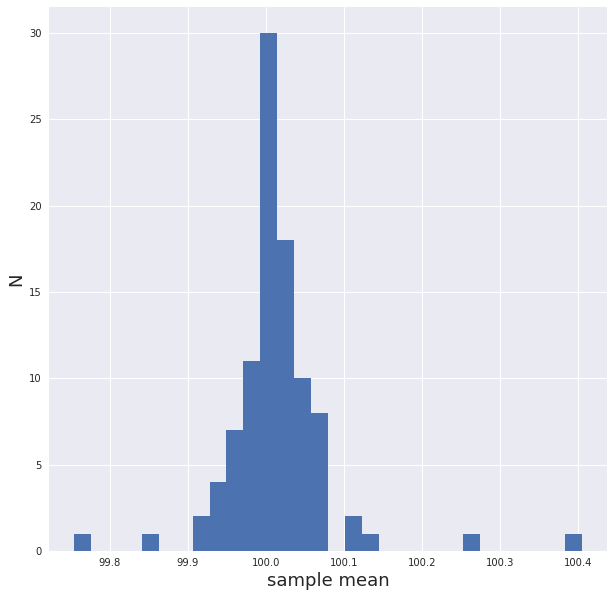

In [43]:
lnormmeans = list(md['lnorm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(lnormmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

Figure 3: The rightskewed is still pretty apparent in this histogram of the samples and ditribution of thier means. It is clear that larger samples gives a better representation of the population

## PLOT the distributions of all sample means (together for all distributions).
Mandatory: as a histogram.

In [44]:
distributions

['gaus', 'pois', 'binomial', 'chisq', 'lnorm']

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


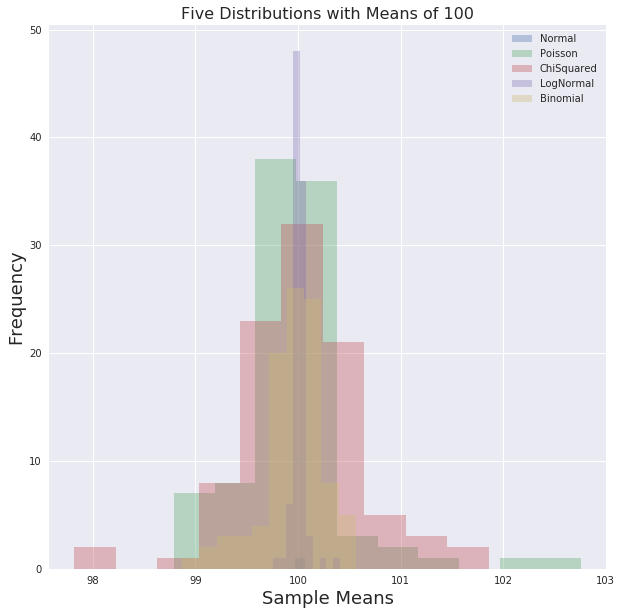

In [45]:
#alpha makes graphs transparent
plt.figure(figsize=(10, 10))
plt.hist(gausmeans, alpha = 0.35, label = 'Normal')

plt.hist(poismeans, alpha = 0.35, label ='Poisson')
plt.hist(chimeans, alpha=0.35, label = 'ChiSquared')
plt.hist(lnormmeans, alpha=0.35, label = 'LogNormal')
plt.hist(binom_means, alpha = 0.35, label = 'Binomial')

plt.xlabel('Sample Means', fontsize = 18)
plt.ylabel('Frequency', fontsize = 18)
plt.title ('Five Distributions with Means of 100', fontsize = 16)
pyplot.legend(loc = 'upper right')

Last Figure: despite having different initial histograms, most distributions tend to look normal when aggregating. Though the lognormal does seem quite a bit more skewed, as expected